In [1]:
import torch
import math
import matplotlib.pyplot as plt

pe_scale = 0.1

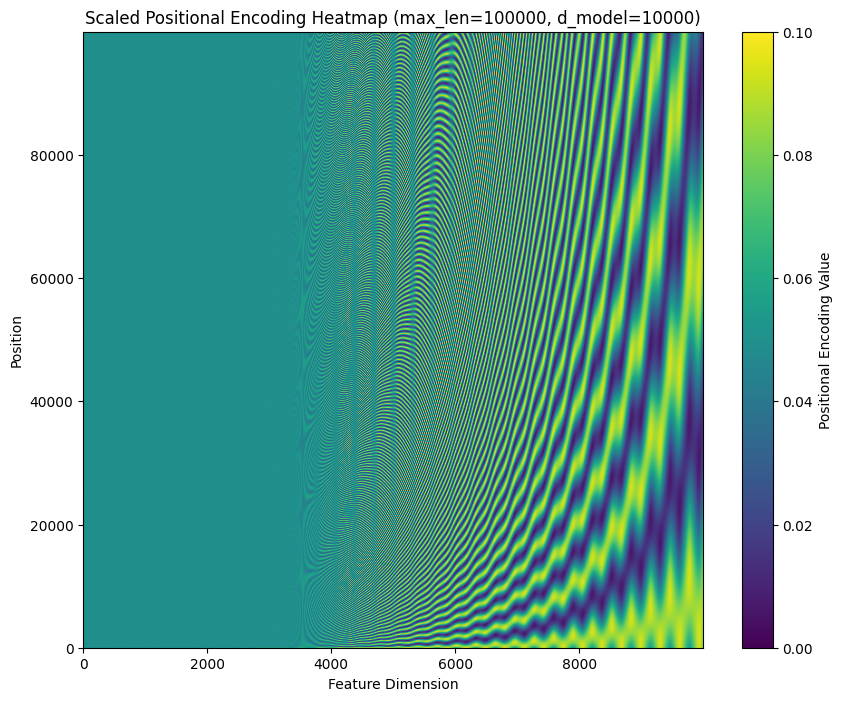

In [4]:
import torch
import math
import matplotlib.pyplot as plt

def generate_pe(max_len, d_model):
    pe = torch.zeros(max_len, d_model)
    position = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    pe = (pe + 1) / 2  # Scale from [-1, 1] to [0, 1]
    pe = 0.1 * pe      # Apply 0.1 scaling factor
    return pe

max_len = 100000
d_model = 10000

pe = generate_pe(max_len, d_model)

plt.figure(figsize=(10, 8))
plt.imshow(pe.numpy(), aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Positional Encoding Value')
plt.xlabel('Feature Dimension')
plt.ylabel('Position')
plt.title(f'Scaled Positional Encoding Heatmap (max_len={max_len}, d_model={d_model})')
plt.show()
